# Name - Sourav Kumar Singh

# Batch - DS2401

# Loan Application Status Prediction Project

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

We have to predict the loan approved or not

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/ssour/Downloads/loan_prediction.csv")
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.rename(columns={
    "LP001002": "ID",
    "Male" : "Gender",
    "No": "Married",
    "0": "Dependent",
    "No.1": "Self Employed",
    "5849": "Applicant Income",
    "0.1": "Co applicant Income",
    "Unnamed: 8": "Loan Amount",
    "360": "Loan Amount Term",
    "1": "Credit History",
    "Urban": "Property Area",
    "Y": "Loan Status"
}, inplace=True)

In [4]:
df.columns

Index(['ID', 'Gender', 'Married', 'Dependent', 'Graduate', 'Self Employed',
       'Applicant Income', 'Co applicant Income', 'Loan Amount',
       'Loan Amount Term', 'Credit History', 'Property Area', 'Loan Status'],
      dtype='object')

In [5]:
df.head(10)

,ID,Gender,Married,Dependent,Graduate,Self Employed,Applicant Income,Co applicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
5,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
6,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
7,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
8,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
9,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,ID,Gender,Married,Dependent,Graduate,Self Employed,Applicant Income,Co applicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
612,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
# Checking the dimension of the dataset
df.shape

(613, 13)

Here we can see that in  datasets there are 613 rows and 13 columns

In [8]:
print("The dimensions of the dataset: ",df.shape)
print("The column headers :",df.columns)

The dimensions of the dataset:  (613, 13)
The column headers : Index(['ID', 'Gender', 'Married', 'Dependent', 'Graduate', 'Self Employed',
       'Applicant Income', 'Co applicant Income', 'Loan Amount',
       'Loan Amount Term', 'Credit History', 'Property Area', 'Loan Status'],
      dtype='object')


In [9]:
df.describe()

,Applicant Income,Co applicant Income,Loan Amount,Loan Amount Term,Credit History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
# checking the types of columns
df.dtypes

ID                      object
Gender                  object
Married                 object
Dependent               object
Graduate                object
Self Employed           object
Applicant Income         int64
Co applicant Income    float64
Loan Amount            float64
Loan Amount Term       float64
Credit History         float64
Property Area           object
Loan Status             object
dtype: object

In [11]:
# Now checking null values in this dataset
df.isnull().sum()

ID                      0
Gender                 13
Married                 3
Dependent              15
Graduate                0
Self Employed          32
Applicant Income        0
Co applicant Income     0
Loan Amount            21
Loan Amount Term       14
Credit History         50
Property Area           0
Loan Status             0
dtype: int64

Here we can see that there is so many null values present in these datasets

In [12]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001003    1
LP002332    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: ID, Length: 613, dtype: int64


Male      488
Female    112
Name: Gender, dtype: int64


Yes    398
No     212
Name: Married, dtype: int64


0     344
1     102
2     101
3+     51
Name: Dependent, dtype: int64


Graduate        479
Not Graduate    134
Name: Graduate, dtype: int64


No     499
Yes     82
Name: Self Employed, dtype: int64


2500    9
4583    6
2600    6
6000    6
5000    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: Applicant Income, Length: 504, dtype: int64


0.0       272
2500.0      5
2083.0      5
1666.0      5
1459.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: Co applicant Income, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0  

# Now we will remove null values

In [13]:
# Gender Columns
df["Gender"].fillna("Male", inplace=True)

In [14]:
# Married Columns
df["Married"].fillna("Yes", inplace=True)

In [15]:
# Dependent Columns
df["Dependent"].fillna(0, inplace=True)

In [16]:
# Self Employed Columns
df["Self Employed"].fillna("No", inplace=True)

In [17]:
# Filling null vlaues in Loan Amount with its mean
df['Loan Amount']= df['Loan Amount'].fillna(df['Loan Amount'].mean())

In [18]:
# Filling null vlaues in Loan Amount Term  with its mean
df['Loan Amount Term']= df['Loan Amount Term'].fillna(df['Loan Amount Term'].mean())

In [19]:
# Credit History Columns
df["Credit History"].fillna(1, inplace=True)

In [20]:
# Now again checking null values in this dataset
df.isnull().sum()

ID                     0
Gender                 0
Married                0
Dependent              0
Graduate               0
Self Employed          0
Applicant Income       0
Co applicant Income    0
Loan Amount            0
Loan Amount Term       0
Credit History         0
Property Area          0
Loan Status            0
dtype: int64

At last we can see that there is no null values presents

<Axes: >

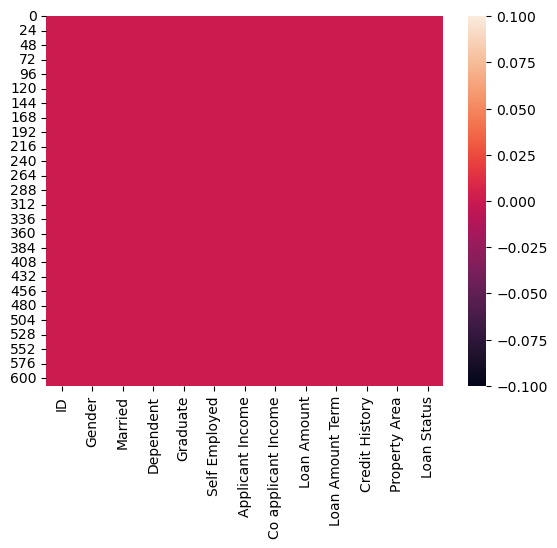

In [21]:
# Now check null values using heatmap
sns.heatmap(df.isnull())

# Exploratory Data Analysis

In [22]:
df.columns

Index(['ID', 'Gender', 'Married', 'Dependent', 'Graduate', 'Self Employed',
       'Applicant Income', 'Co applicant Income', 'Loan Amount',
       'Loan Amount Term', 'Credit History', 'Property Area', 'Loan Status'],
      dtype='object')

In [23]:
df.shape

(613, 13)

In [24]:
print("The Columns of these Datasets: ",df.columns)
print("The Dimension of these Datasets: ",df.shape)

The Columns of these Datasets:  Index(['ID', 'Gender', 'Married', 'Dependent', 'Graduate', 'Self Employed',
       'Applicant Income', 'Co applicant Income', 'Loan Amount',
       'Loan Amount Term', 'Credit History', 'Property Area', 'Loan Status'],
      dtype='object')
The Dimension of these Datasets:  (613, 13)


In [25]:
df.info

<bound method DataFrame.info of            ID  Gender Married Dependent      Graduate Self Employed  \
0    LP001003    Male     Yes         1      Graduate            No   
1    LP001005    Male     Yes         0      Graduate           Yes   
2    LP001006    Male     Yes         0  Not Graduate            No   
3    LP001008    Male      No         0      Graduate            No   
4    LP001011    Male     Yes         2      Graduate           Yes   
..        ...     ...     ...       ...           ...           ...   
608  LP002978  Female      No         0      Graduate            No   
609  LP002979    Male     Yes        3+      Graduate            No   
610  LP002983    Male     Yes         1      Graduate            No   
611  LP002984    Male     Yes         2      Graduate            No   
612  LP002990  Female      No         0      Graduate           Yes   

     Applicant Income  Co applicant Income  Loan Amount  Loan Amount Term  \
0                4583               15

In [26]:
df.describe()

,Applicant Income,Co applicant Income,Loan Amount,Loan Amount Term,Credit History
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.854812
std,6114.004114,2927.903583,84.106098,64.420943,0.352578
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [27]:
df.drop(["ID"], axis=1, inplace=True)

In [28]:
# Now separating categorical columns and numercial columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical_col :",categorical_col)

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numercial_col :",numerical_col)

Categorical_col : ['Gender', 'Married', 'Dependent', 'Graduate', 'Self Employed', 'Property Area', 'Loan Status']
Numercial_col : ['Applicant Income', 'Co applicant Income', 'Loan Amount', 'Loan Amount Term', 'Credit History']


In [29]:
# Now we checking the number of uniques values
df.nunique().to_frame("No. of uniques values")

,No. of uniques values
Gender,2
Married,2
Dependent,5
Graduate,2
Self Employed,2
Applicant Income,504
Co applicant Income,287
Loan Amount,204
Loan Amount Term,11
Credit History,2


# Now we check unique values

In [30]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [31]:
df["Married"].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
df["Dependent"].unique()

array(['1', '0', '2', '3+', 0], dtype=object)

In [33]:
df["Graduate"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [34]:
df["Property Area"].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [35]:
df["Loan Status"].unique()

array(['N', 'Y'], dtype=object)

# Data Visualize

Male      501
Female    112
Name: Gender, dtype: int64


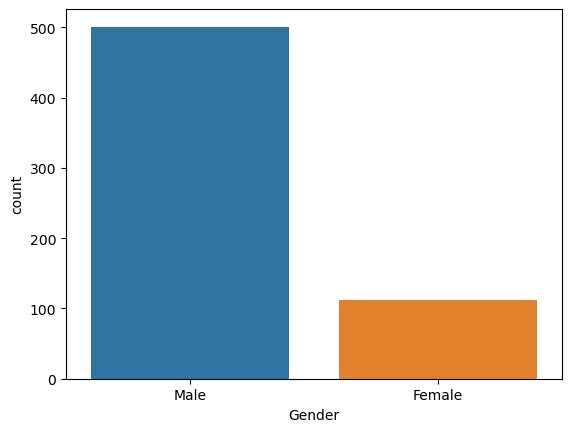

In [36]:
# visualize the number of  Gender
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

Yes    401
No     212
Name: Married, dtype: int64


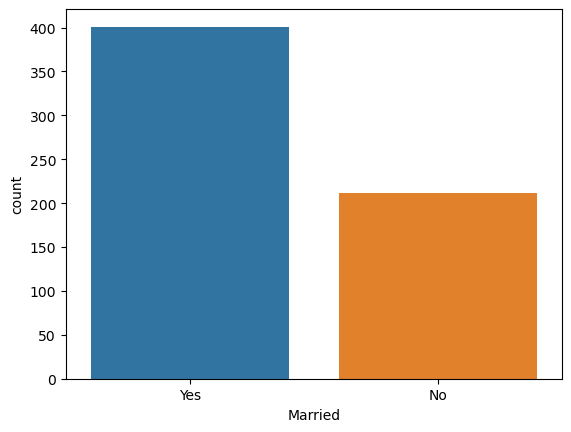

In [37]:
# visualize the number of  Married
ax=sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

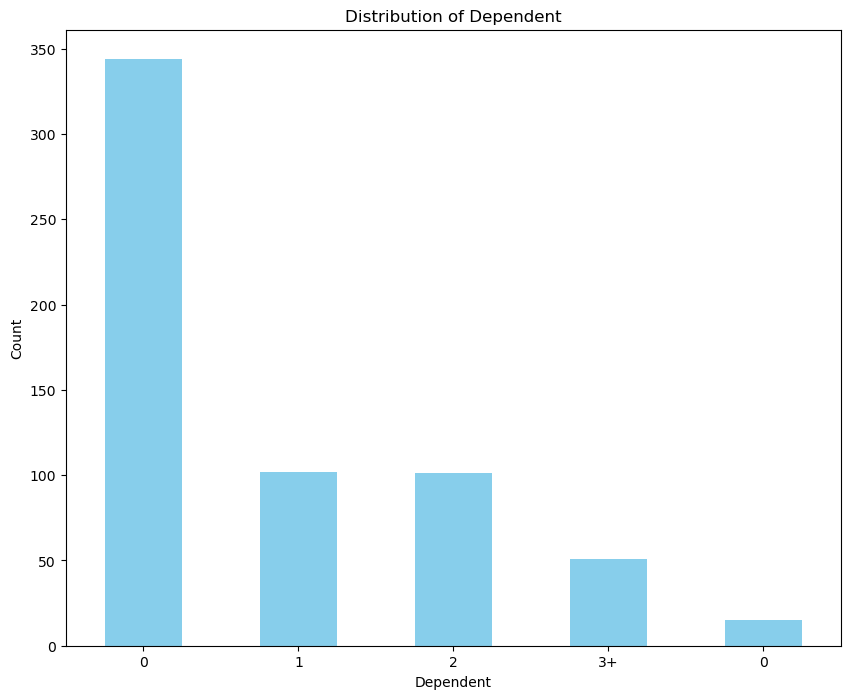

In [38]:
# Assuming df is your DataFrame and it has a column named 'Dependent'
job_counts = df["Dependent"].value_counts()

plt.figure(figsize=(10,8))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of Dependent")
plt.xlabel("Dependent")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

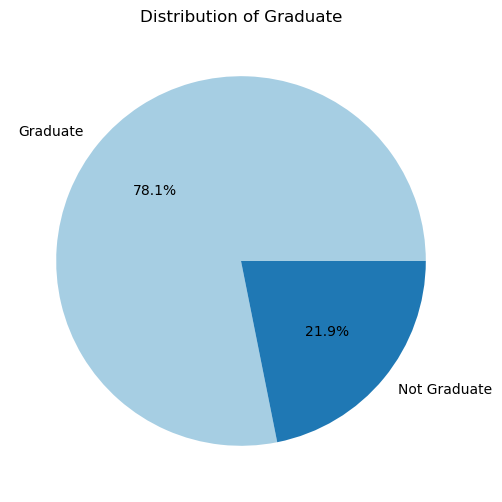

In [39]:
# Assuming df is your DataFrame and it has a column named 'Graduate'
job_counts = df["Graduate"].value_counts()

plt.figure(figsize=(8,6))
job_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Graduate")
plt.ylabel("")  # Hide the y-label

plt.show()

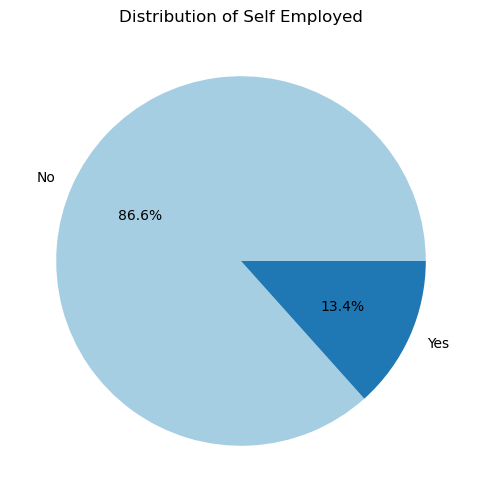

In [40]:
# Assuming df is your DataFrame and it has a column named 'Self Employed'
job_counts = df["Self Employed"].value_counts()

plt.figure(figsize=(8,6))
job_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Self Employed")
plt.ylabel("")  # Hide the y-label

plt.show()

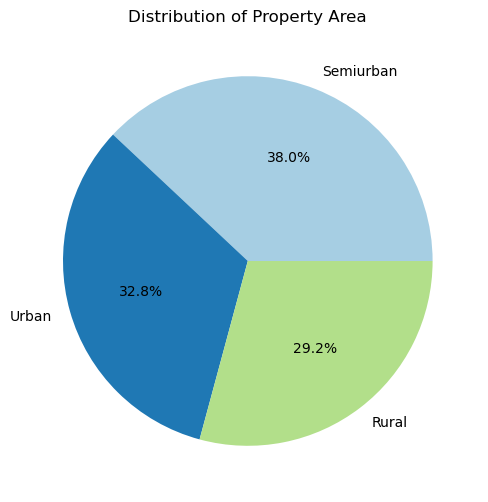

In [41]:
# Assuming df is your DataFrame and it has a column named 'Property Area'
job_counts = df["Property Area"].value_counts()

plt.figure(figsize=(8,6))
job_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Property Area")
plt.ylabel("")  # Hide the y-label

plt.show()

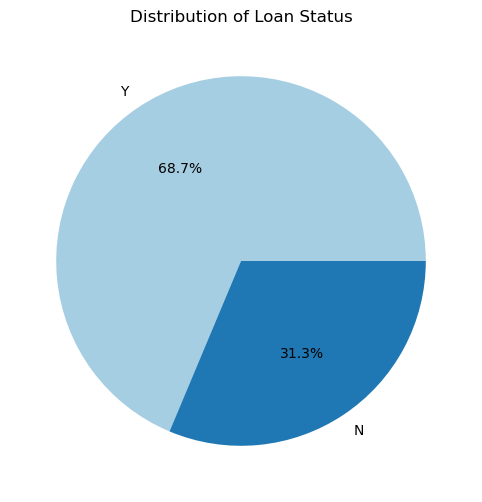

In [42]:
# Assuming df is your DataFrame and it has a column named 'Loan Status'
job_counts = df["Loan Status"].value_counts()

plt.figure(figsize=(8,6))
job_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Loan Status")
plt.ylabel("")  # Hide the y-label

plt.show()

# Relational Analysis

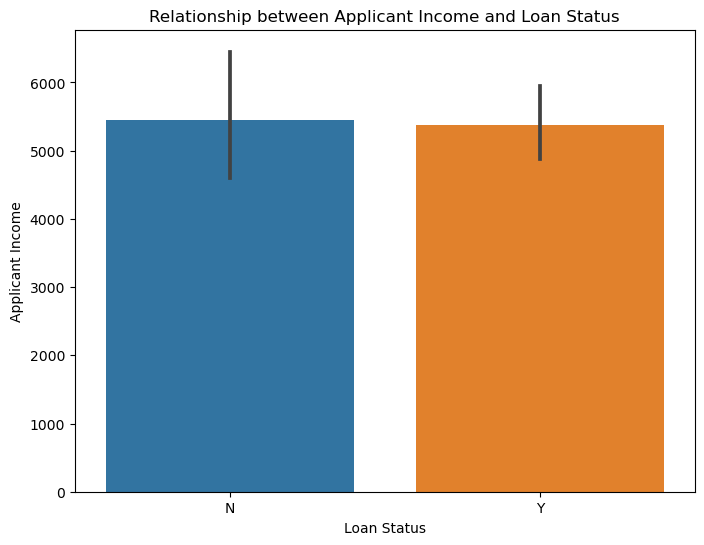

In [43]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Loan Status", y="Applicant Income", data=df)

# Set labels and title
plt.xlabel("Loan Status")
plt.ylabel("Applicant Income")
plt.title("Relationship between Applicant Income and Loan Status")

# Show the plot
plt.show()

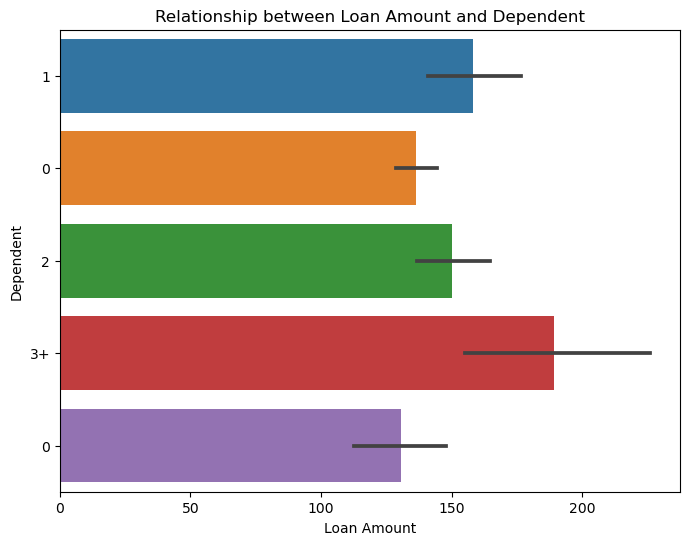

In [44]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Loan Amount", y="Dependent", data=df)

# Set labels and title
plt.xlabel("Loan Amount")
plt.ylabel("Dependent")
plt.title("Relationship between Loan Amount and Dependent")

# Show the plot
plt.show()

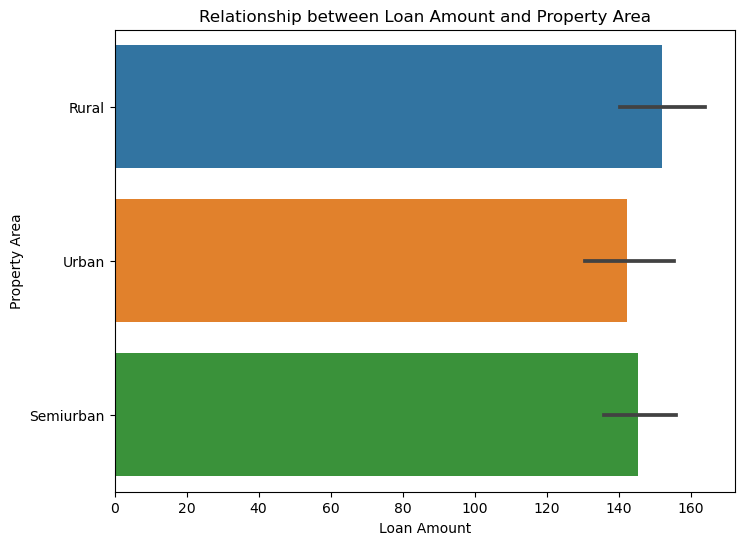

In [45]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Loan Amount", y="Property Area", data=df)

# Set labels and title
plt.xlabel("Loan Amount")
plt.ylabel("Property Area")
plt.title("Relationship between Loan Amount and Property Area")

# Show the plot
plt.show()

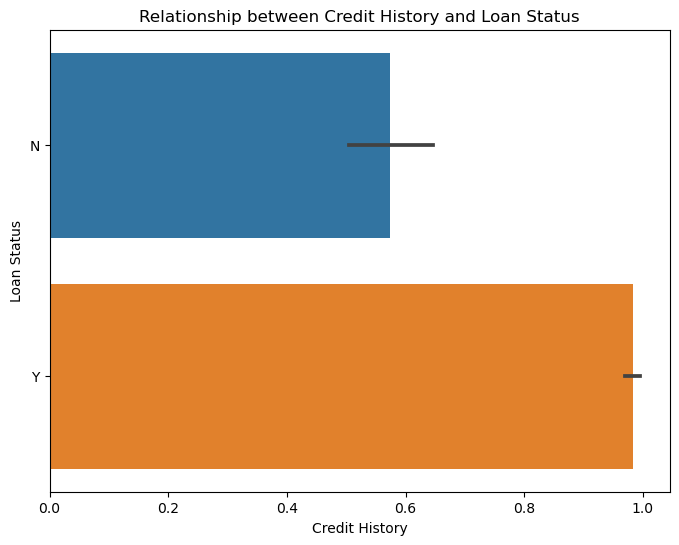

In [46]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Credit History", y="Loan Status", data=df)

# Set labels and title
plt.xlabel("Credit History")
plt.ylabel("Loan Status")
plt.title("Relationship between Credit History and Loan Status")

# Show the plot
plt.show()

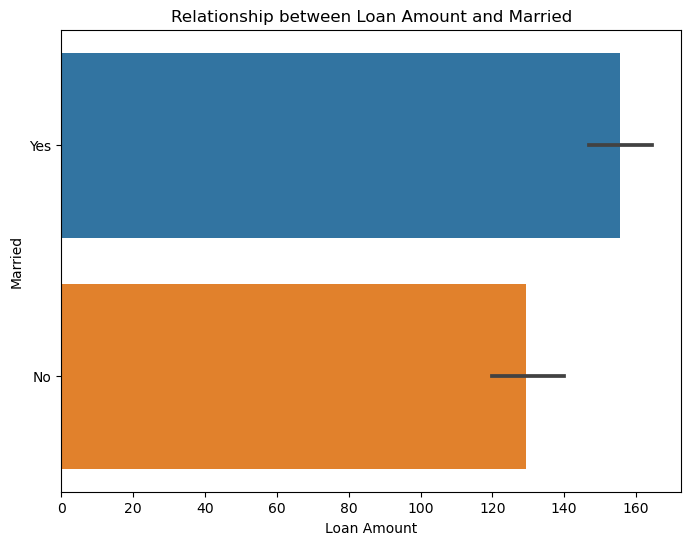

In [47]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Loan Amount", y="Married", data=df)

# Set labels and title
plt.xlabel("Loan Amount")
plt.ylabel("Married")
plt.title("Relationship between Loan Amount and Married")

# Show the plot
plt.show()

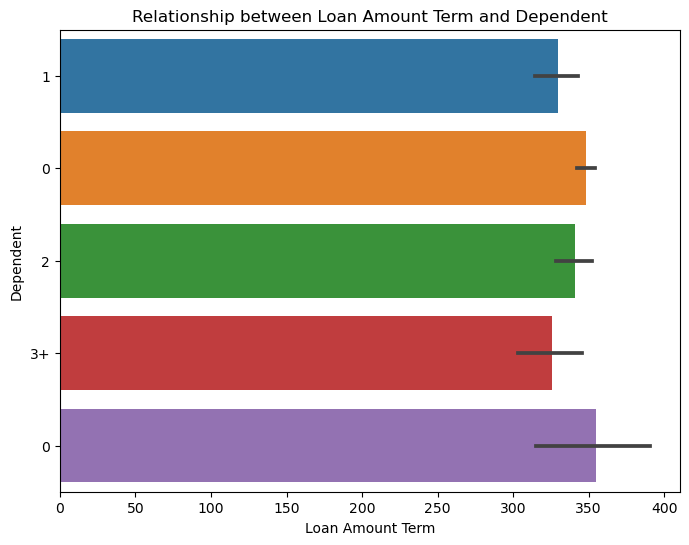

In [48]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Loan Amount Term", y="Dependent", data=df)

# Set labels and title
plt.xlabel("Loan Amount Term")
plt.ylabel("Dependent")
plt.title("Relationship between Loan Amount Term and Dependent")

# Show the plot
plt.show()

# Checking for outliers

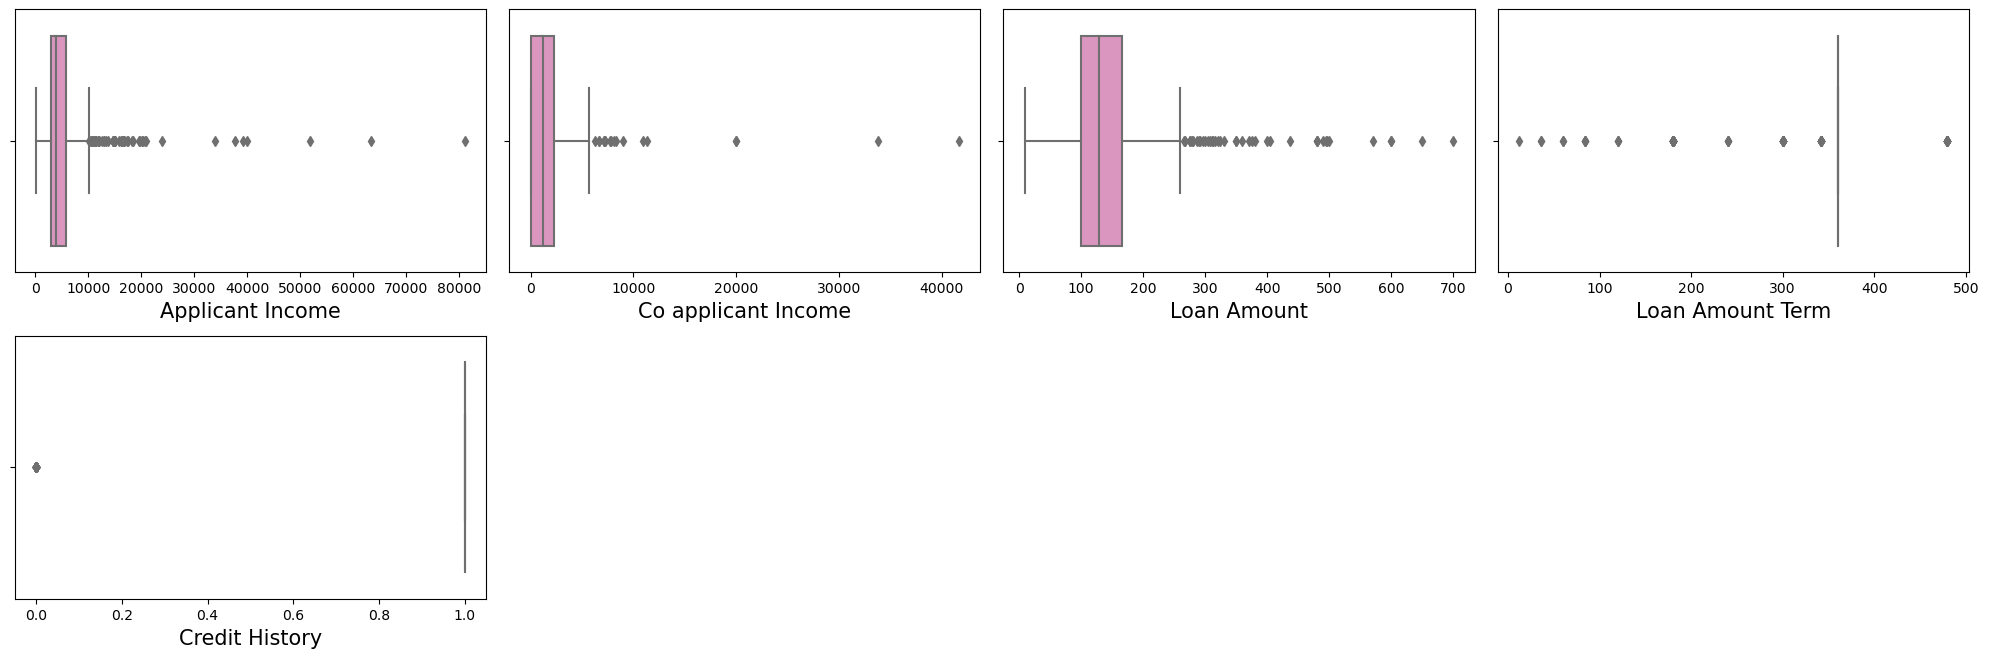

In [49]:
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

Almost all coulmns contains some outliers

# Using IQR method removed outleirs

In [50]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest = ['Applicant Income', 'Co applicant Income', 'Loan Amount', 'Loan Amount Term', 'Credit History']

Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)

DataFrame after removing outliers:
     Gender Married Dependent      Graduate Self Employed  Applicant Income  \
0      Male     Yes         1      Graduate            No              4583   
1      Male     Yes         0      Graduate           Yes              3000   
2      Male     Yes         0  Not Graduate            No              2583   
3      Male      No         0      Graduate            No              6000   
5      Male     Yes         0  Not Graduate            No              2333   
..      ...     ...       ...           ...           ...               ...   
606    Male     Yes         2  Not Graduate            No              3987   
607    Male     Yes         0      Graduate            No              3232   
608  Female      No         0      Graduate            No              2900   
610    Male     Yes         1      Graduate            No              8072   
611    Male     Yes         2      Graduate            No              7583   

     Co applican

Here we can see that 227 rows are deleted

In [51]:
df1.dtypes

Gender                  object
Married                 object
Dependent               object
Graduate                object
Self Employed           object
Applicant Income         int64
Co applicant Income    float64
Loan Amount            float64
Loan Amount Term       float64
Credit History         float64
Property Area           object
Loan Status             object
dtype: object

# Label Encoder

In [52]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Dictionary to store mappings
mappings = {}

# Apply label encoding to each categorical column and store the mappings
for col in categorical_col:
    df1[col] = df1[col].astype(str)  # Ensure all values are strings
    df1[col] = label_encoder.fit_transform(df1[col])
    mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Encoded DataFrame:\n", df1.head())
print("\nMappings for each column:")
for col, mapping in mappings.items():
    print(f"{col} mapping:", mapping)

Encoded DataFrame:
    Gender  Married  Dependent  Graduate  Self Employed  Applicant Income  \
0       1        1          1         0              0              4583   
1       1        1          0         0              1              3000   
2       1        1          0         1              0              2583   
3       1        0          0         0              0              6000   
5       1        1          0         1              0              2333   

   Co applicant Income  Loan Amount  Loan Amount Term  Credit History  \
0               1508.0        128.0             360.0             1.0   
1                  0.0         66.0             360.0             1.0   
2               2358.0        120.0             360.0             1.0   
3                  0.0        141.0             360.0             1.0   
5               1516.0         95.0             360.0             1.0   

   Property Area  Loan Status  
0              0            0  
1              2    

# Checking how the data is distributed

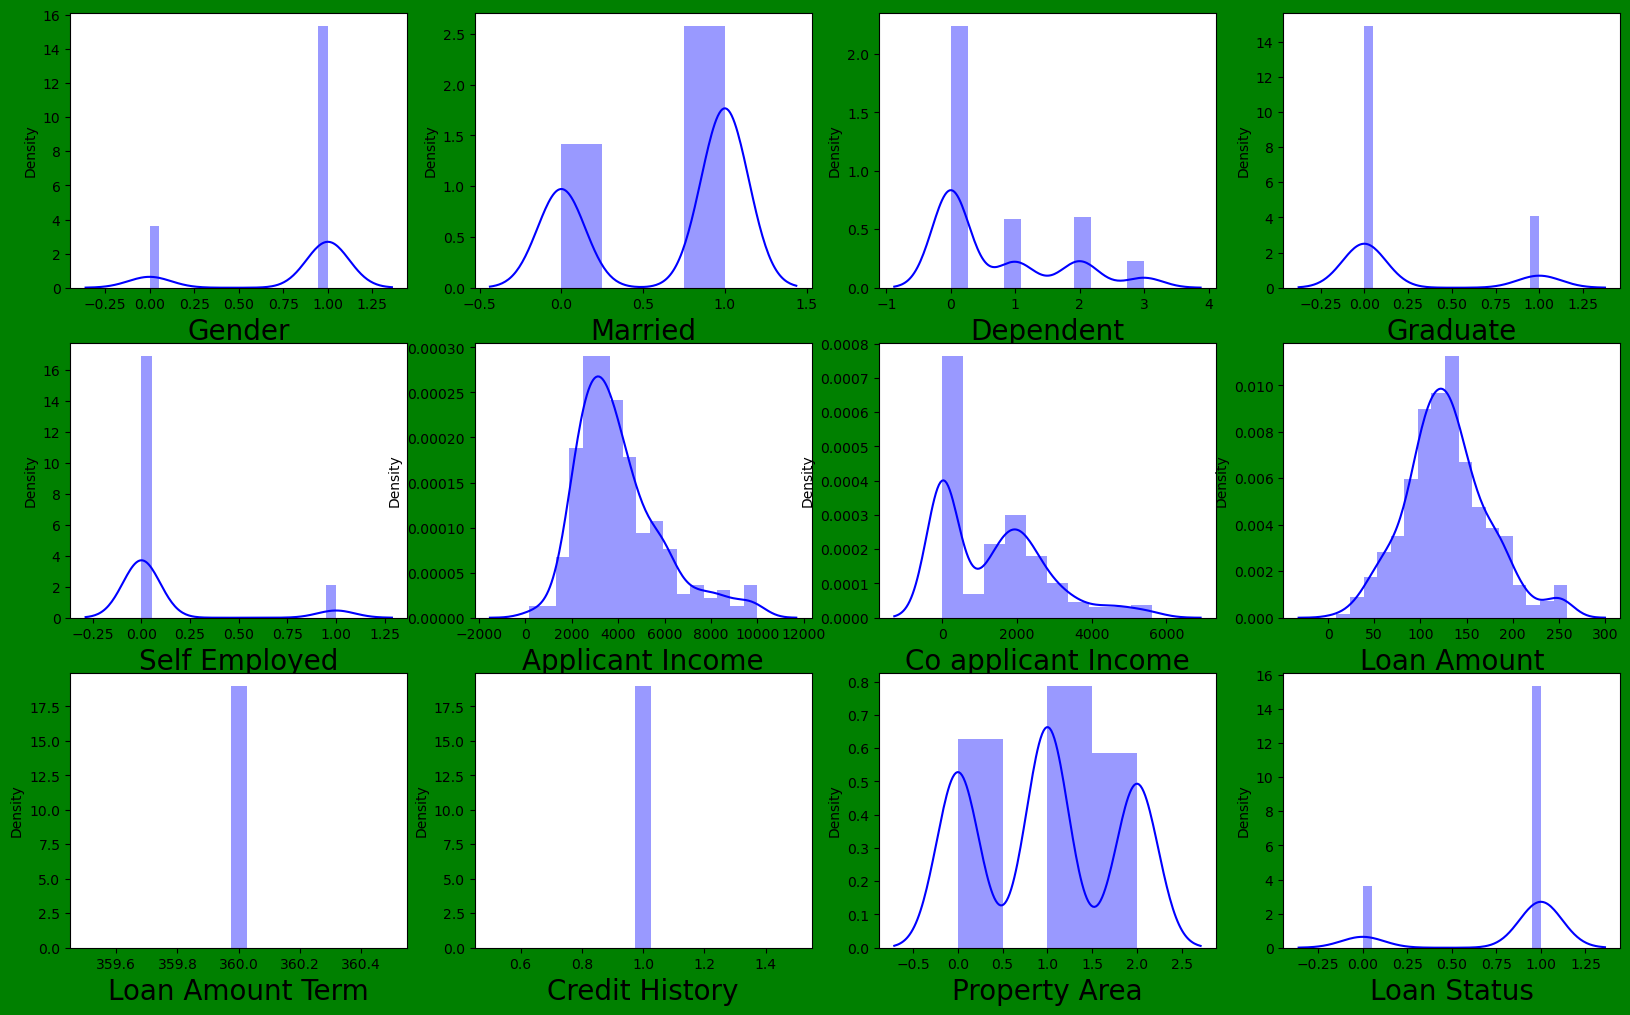

In [53]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in df1:
    if plotnumber <= 18:
        ax =plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

In [54]:
# Now all data are converted into numercial form so no we check skewness
df1.skew()

Gender                -1.572449
Married               -0.608767
Dependent              1.103436
Graduate               1.392692
Self Employed          2.479892
Applicant Income       1.122113
Co applicant Income    0.843290
Loan Amount            0.408599
Loan Amount Term       0.000000
Credit History         0.000000
Property Area          0.036088
Loan Status           -1.572449
dtype: float64

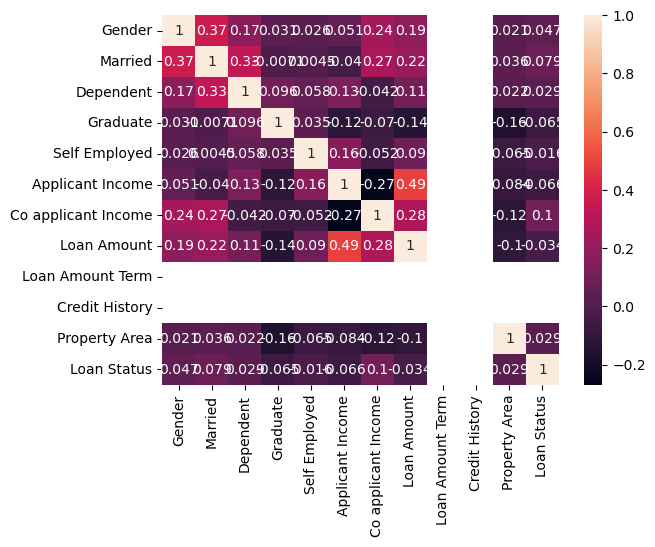

In [55]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

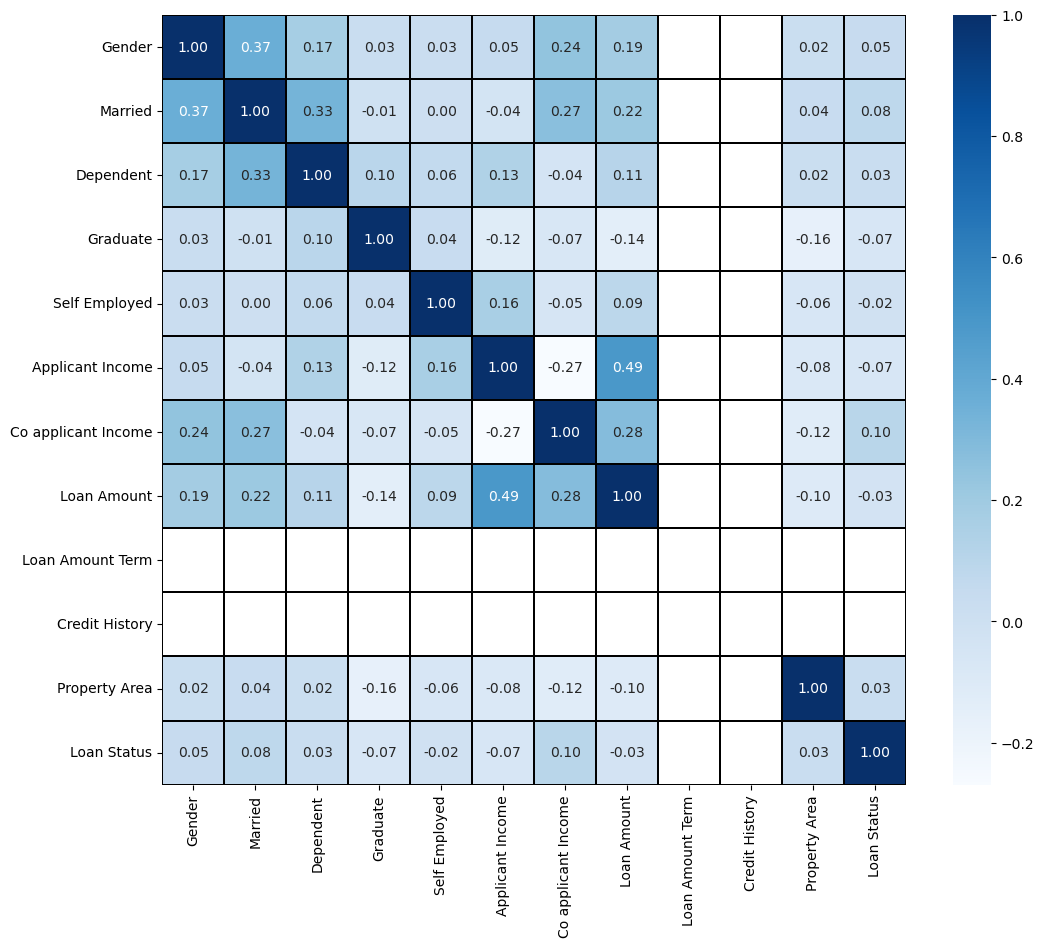

In [56]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(df1.corr(), 
            annot=True,        # Show correlation values on the heatmap
            cmap="Blues",      # Set the color map to 'Blues'
            linewidths=0.1,    # Set width between cells
            linecolor='black', # Color of the lines separating cells
            fmt='.2f')       # Ensure cells are square-shaped

# Rotate y-axis labels to be horizontal
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

Here we can see that all skewness is looks like perfect

# Split the target features

In [57]:
# Separating the independent and target varaible into x and y
x = df1.drop(['Loan Status'], axis=1)  # Features we remove Loan Status columns
y = df1['Loan Status']    #  Here now the Loan Status is my target variable
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (386, 11)
Label Dimensions (386,)


In [58]:
y.value_counts()

1    312
0     74
Name: Loan Status, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE

# Reduce the number of neighbors to avoid the error
SM = SMOTE(k_neighbors=4)  # Adjust k_neighbors based on your minority class size
x1, y1 = SM.fit_resample(x, y)

In [60]:
y1.value_counts()

0    312
1    312
Name: Loan Status, dtype: int64

Now these time y value is same

# Classification Algorithm

In [61]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# Find the best random state and max accuracy

In [62]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 50):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    
    # Initializing and training the RandomForestClassifier
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    
    # Making predictions on the test set
    pred = RFR.predict(x_test)
    
    # Calculating accuracy of the model
    acc = accuracy_score(y_test, pred)
    
    # Updating maxAccu and maxRS if current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

In [63]:
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.8404255319148937 at random_state 39


Here we can see that almost 85 % accuracy from where random state is 1.

# Creating train test split

In [64]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=maxRS)

# RandomForestClassifier

In [65]:
# Instantiate and train RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions on the test set
pred_rf = rf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_rf)
print("Classification Report:")
print(report)

Accuracy: 0.7978723404255319
Confusion Matrix:
[[73 19]
 [19 77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        92
           1       0.80      0.80      0.80        96

    accuracy                           0.80       188
   macro avg       0.80      0.80      0.80       188
weighted avg       0.80      0.80      0.80       188



# Support Vector Machine Classifier

In [66]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_svc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_svc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_svc)
print("Classification Report:")
print(report)

Accuracy: 0.5585106382978723
Confusion Matrix:
[[56 36]
 [47 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.61      0.57        92
           1       0.58      0.51      0.54        96

    accuracy                           0.56       188
   macro avg       0.56      0.56      0.56       188
weighted avg       0.56      0.56      0.56       188



# Gradient Boosting Classifier

In [67]:
# Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_gb=GB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_gb)  
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_gb)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_gb)
print("Classification Report:")
print(report)

Accuracy: 0.7712765957446809
Confusion Matrix:
[[71 21]
 [22 74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77        92
           1       0.78      0.77      0.77        96

    accuracy                           0.77       188
   macro avg       0.77      0.77      0.77       188
weighted avg       0.77      0.77      0.77       188



# Ada Boost Classifier

In [68]:
# Checking accuracy for AdaBoostClassifier
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pred_ab=AB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_ab)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_ab)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_ab)
print("Classification Report:")
print(report)

Accuracy: 0.7180851063829787
Confusion Matrix:
[[66 26]
 [27 69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71        92
           1       0.73      0.72      0.72        96

    accuracy                           0.72       188
   macro avg       0.72      0.72      0.72       188
weighted avg       0.72      0.72      0.72       188



# Extra Trees Classifier

In [69]:
# Checking accuracy for the ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_et=ET.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_et)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_et)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_et)
print("Classification Report:")
print(report)

Accuracy: 0.7819148936170213
Confusion Matrix:
[[69 23]
 [18 78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        92
           1       0.77      0.81      0.79        96

    accuracy                           0.78       188
   macro avg       0.78      0.78      0.78       188
weighted avg       0.78      0.78      0.78       188



After checking each algorithm, it was found that Random Forest Classifier is the best algorithm.

Now we find best hyper parameter

# Hyper parameter Tunings

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Model: RandomForestClassifier(n_estimators=300)


In [71]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Define the model
model = RandomForestClassifier(bootstrap=False, 
                               max_depth=20, 
                               max_features='sqrt', 
                               min_samples_leaf=1, 
                               min_samples_split=2, 
                               n_estimators=100)

# Train the model
model.fit(x_train, y_train)

# Save the model to a file
with open("Loan_application_status.pkl", 'wb') as file:
    pickle.dump(model, file)

In [72]:
import pickle

# Load the model from the file
with open("Loan_application_status.pkl", 'rb') as file:
    load_model = pickle.load(file)

# Ensure that the model is fitted before calling score
if hasattr(load_model, "fit"):
    # Evaluate the model on test data
    result = load_model.score(x_test, y_test)
    print(result * 100)
else:
    print("The model is not fitted yet.")

82.97872340425532


In [73]:
load_model = pickle.load(open("Loan_application_status.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

82.97872340425532


# Make the diagram to predict loan status

In [74]:
import joblib

# Define the mapping dictionaries
# Define the mapping dictionaries
Gender_mapping = {'Female': 0, 'Male': 1}
Married_mapping = {'No': 0, 'Yes': 1}
Dependent_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
Graduate_mapping = {'Graduate': 0, 'Not Graduate': 1}
Self_Employed_mapping = {'No': 0, 'Yes': 1}
Property_Area_mapping = {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
Loan_Status_mapping = {'N': 0, 'Y': 1}

# Define the input data ( characteristics)
input_data = ["Male", "Yes", "1", "Graduate", "No", 4583, 1508.0, 128.0, 360.0, 1.0, "Rural"]

# Map the input data
input_data_numerical = [
    Gender_mapping[input_data[0]],
    Married_mapping[input_data[1]],
    Dependent_mapping[input_data[2]],
    Graduate_mapping[input_data[3]],
    Self_Employed_mapping[input_data[4]],
    input_data[5],
    input_data[6],
    input_data[7],
    input_data[8],
    input_data[9],
    Property_Area_mapping[input_data[10]]
]

# Load your trained model
model = joblib.load('Loan_application_status.pkl')

# Make prediction using the trained model
prediction = model.predict([input_data_numerical])

# Print the input data and predicted loan status
print("Input Data (Numerical):", input_data_numerical)
print("Predicted Loan Status:", prediction)

Input Data (Numerical): [1, 1, 1, 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0]
Predicted Loan Status: [0]


In [75]:
if prediction == 1:
    print("Loan Status is approved")
else:
    print("Loan Status is not approved")

Loan Status is not approved


# THANK YOU